In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
filename = 'cleaned_df.csv'

df = pd.read_csv(filename)

df = df.drop(columns='Unnamed: 0', axis=1)

df = df.rename(columns={'hospdead': 'label'})

#move label to the first position
first_column = df.pop('label') 
df.insert(0, 'label', first_column) 

print('Shape', df.shape)
df.head()

Shape (9103, 56)


,label,age,death,sex,slos,d.time,num.co,edu,scoma,charges,...,dzclass_Cancer,dzclass_Coma,ca_metastatic,ca_no,ca_yes,income_$11-$25k,income_$25-$50k,income_>$50k,income_under $11k,income_unknown
0,0,62.84998,0,0,5,2029,0,11.0,0.0,9715.0,...,1,0,1,0,0,1,0,0,0,0
1,1,60.33899,1,1,4,4,2,12.0,44.0,34496.0,...,0,0,0,1,0,1,0,0,0,0
2,0,52.74698,1,1,17,47,2,12.0,0.0,41094.0,...,0,0,0,1,0,0,0,0,1,0
3,0,42.38498,1,1,3,133,2,11.0,0.0,3075.0,...,1,0,1,0,0,0,0,0,1,0
4,0,79.88495,0,1,16,2029,1,NaN,26.0,50127.0,...,0,0,0,1,0,0,0,0,0,1


                            Correlation with label
label                                     1.000000
dnr                                       0.564712
avtisst                                   0.552539
aps                                       0.475971
sps                                       0.462634
death                                     0.404802
scoma                                     0.379563
dzclass_ARF/MOSF                          0.232816
hday                                      0.213890
dzclass_Coma                              0.210364
dzgroup_Coma                              0.210364
charges                                   0.187240
dzgroup_MOSF w/Malig                      0.177862
bili                                      0.144741
dzgroup_ARF/MOSF w/Sepsis                 0.140404
adlsc                                     0.126764
ca_yes                                    0.105952
adlp                                      0.099518
crea                           

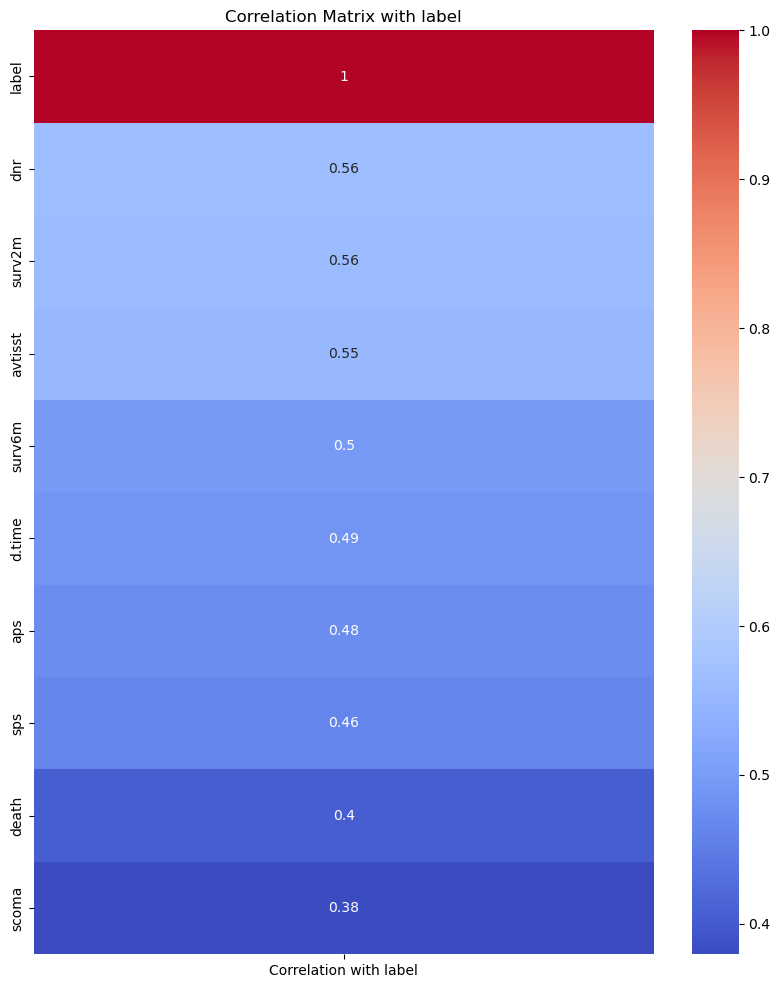

In [3]:

# Calculate the correlation with 'label'
correlation_with_label = df.corrwith(df['label']).to_frame()
correlation_with_label.columns = ['Correlation with label']

#Sort the DataFrame by the 'Correlation with label' column
correlation_with_label = correlation_with_label.sort_values(by='Correlation with label', ascending=False)

print(correlation_with_label)

# Sort the values by the 'Correlation with label' column
top_10_correlated_features = correlation_with_label.abs().sort_values(by='Correlation with label', ascending=False).head(10)


# Plotting the correlation matrix for 'label'
plt.figure(figsize=(10, 12))
sns.heatmap(top_10_correlated_features, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix with label')
plt.show()

In [4]:
df.isnull().sum()

label                            0
age                              0
death                            0
sex                              0
slos                             0
d.time                           0
num.co                           0
edu                           1634
scoma                            0
charges                        171
avtisst                         81
sps                              0
aps                              0
surv2m                           0
surv6m                           0
hday                             0
diabetes                         0
dementia                         0
dnr                              0
dnrday                          29
meanbp                           0
wblc                             0
hrt                              0
resp                             0
temp                             0
pafi                             0
alb                              0
bili                             0
crea                

label
0    6744
1    2359
Name: count, dtype: int64


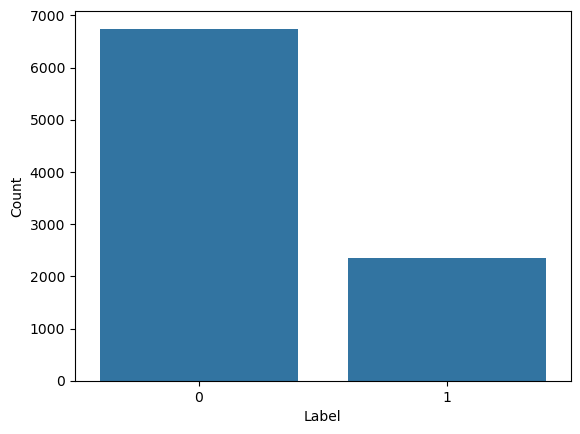

In [5]:
#check how many values of each label value

class_values = df['label'].value_counts()
print(class_values)

# Count the values of the 'label' column
class_values = df['label'].value_counts().reset_index()

# Rename columns for clarity in the plot
class_values.columns = ['Label', 'Count']

# Create the bar plot
sns.barplot(x='Label', y='Count', data=class_values)
plt.show()

Class imbalance problem? 
Solutions:
1. Under/Oversampling. 
2. Modify weight on a loss functin is the second option. 
3. Synthetic Minority Oversampling Technique (SMOTE)
##### Will fix when separating by test and training data
https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/#Resampling_Techniques_to_Solve_Class_Imbalance

In [6]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter

# Separating the features (x) and the target variable (y)
x = df.drop('label', axis=1)
y = df['label']

# Applying SMOTE
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(x, y)

# Print the count of each class in the original and resampled dataset
print('Original dataset shape', Counter(y))
print('Resampled dataset shape', Counter(y_smote))


ValueError: Input X contains NaN.
SMOTE does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values